# Лабораторная работа №2: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2384 Поглазов Никита Васильевич и Вовченко София Евгеньевна. Вариант №14.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

1. **Дискретный единичный скачок.**
        $$
        \sigma_d(k)=\begin{cases}
        1, & k\ge 0,\\
        0, & k<0.
        \end{cases}
        $$

2. **Дискретный прямоугольный импульс.**
$$
  s_1(k) = \begin{cases} U, & 0 \leq k < n_{imp} \\ 0, & \text{иначе} \end{cases} = U \cdot (\sigma_d(k) - \sigma_d(k - n_{imp})),
  $$
  где $n_{imp}$ - длительность импульса, а $U$ - его амплитуда.

3. **Линейная комбинация $s(k)$ дискретных сигналов $ x_1(k), x_2(k), ..., x_{n}(k)$.**
$$
    s(k) = \sum_{i = 1}^{k} a_i x_i(k),
$$
где $a_i$ - вес сигнала $ x_i(k) $, характеризующий его вклад в итоговый сигнал $ s(k) $.
4. **Среднее значение дискретного сигнала $ s(k) $.**
$$ \bar{s} = \frac{1}{N} \sum_{k=0}^{N-1} s(k) $$
5. **Энергия дискретного сигнала $ s(k) $.**
$$ E = \sum_{k=0}^{N-1} |s(k)|^2 $$
6.  **Мощность дискретного сигнала $ s(k) $.**
  $$ P = \frac{E}{N} = \frac{1}{N} \sum_{k=0}^{N-1} |s(k)|^2 $$
7. **Дискретный сигнал с экспоненциальной огибающей $|a|^k$.**
$$ s^\prime(k) = s(k) \cdot |a|^k, |a| < 1 $$


## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
Nb = 14  # Номер варианта
N = 30 + Nb % 5  # Длина последовательности
a = .8 + 5e-3 * (Nb % 20)  # Основание экспоненты
C = 1 + Nb % 5  # Амплитуда гармонического сигнала
w0 = np.pi / (6 + Nb % 5)  # Частота гармонического сигнала
U = Nb % 20 + 1  # Амплитуда импульса
n0 = 3 + Nb % 5  # Начальный момент импульса
n_imp = 5 + Nb % 5  # Длина импульса

B1 = 1.5 + Nb % 5  # Амплитуда гармонического сигнала 1
B2 = 5.7 - Nb % 5  # Амплитуда гармонического сигнала 2
B3 = 2.2 + Nb % 5  # Амплитуда гармонического сигнала 3

w1 = np.pi / (4 + Nb % 5)   # Частота гармонического сигнала 1
w2 = np.pi / (8 + Nb % 5)   # Частота гармонического сигнала 2
w3 = np.pi / (16 + Nb % 5)  # Частота гармонического сигнала 3

a1 = 1.5 - Nb % 5  # Коэффициент линейной комбинации 1
a2 = 0.7 + Nb % 5  # Коэффициент линейной комбинации 2
a3 = 1.4 + Nb % 5  # Коэффициент линейной комбинации 3

In [7]:
n = np.arange(N)  # Отсчеты

- Смоделировать дискретный прямоугольный импульс: $$ s_1(k) = \begin{cases} U,& \quad n_0 \leqslant k \leqslant n_0 + n_{imp} - 1; \\ 0,& \quad \text{иначе} \\ \end{cases} $$ на основе дискретного единичного скачка $ \sigma_d(k) $ из л/р №1 с выводом графика на интервале времени $ n \in [0, N - 1] $. Пояснить как выполняется моделирование импульса.


Единичный скачок определяется как
$$ \sigma_d(k) = \begin{cases} 1,& \quad k \geqslant 0; \\ 0,& \quad \text{иначе} \\ \end{cases} $$
Чтобы смоделировать прямоугльный имппульс, надо вызвать скачок размера $U$ в момент времени $n_0$ как $U \cdot \sigma_d(k - n_0)$ и убрать его в момент времени $n_0 + n_{imp}$ с помощью сложения с сигналом $-U \cdot \sigma_d(k - n_0 - n_{imp})$. Тогда прямоугольный импульс будет равен
$$ s_1(k) = U \cdot ( \sigma_d(k - n_0) - \sigma_d(k - n_0 - n_{imp}) ) $$

In [29]:
def sigma_digital(n: np.ndarray) -> np.ndarray:
    return np.where(n >= 0, 1, 0)

def rectangular_impulse(n: np.ndarray) -> np.ndarray:
    return U * (sigma_digital(n - n0) - sigma_digital(n - n0 - n_imp))

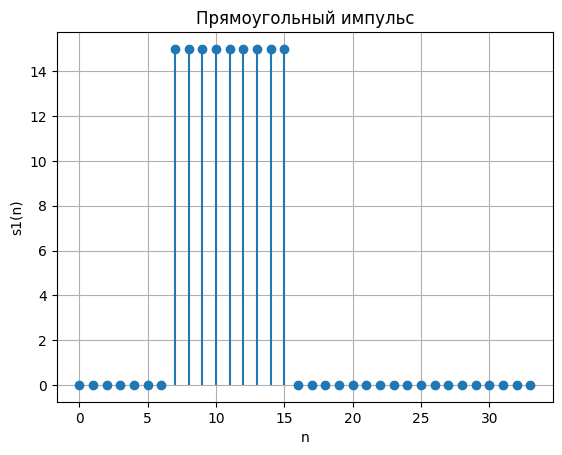

In [11]:
plt.stem(n, rectangular_impulse(n), basefmt=' ')
plt.title('Прямоугольный импульс')
plt.xlabel('n')
plt.ylabel('s1(n)')
plt.grid()
plt.show()

- Смоделировать линейную комбинацию дискретных гармонических сигналов $ s_2(k) $: $$ s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k), $$ где $$ x_i(k) = B_i\sin(\hat\omega_ik), \quad i = 1, 2, 3, $$ с выводом графиков последовательностей $ x_i(k) $ и $ s_2(k) $ на интервале времени $ n \in [0, 5N - 1] $. Вычислить среднее значение (идентификатор ''mean_s2''), энергию (идентификатор ''E'') и среднюю мощность последовательности $ s_2(k) $ (идентификатор ''P''). Пояснить:
  - операции при моделировании линейной комбинации сигналов $ s_2(k) $;
  - как определяют указанные характеристики.


In [18]:
n = np.arange(5 * N)  # Отсчеты

Bs = np.array([B1, B2, B3])
ws = np.array([w1, w2, w3])
as_ = np.array([a1, a2, a3])

In [32]:
def xs(n: np.ndarray) -> np.ndarray:
    ws_n = ws.reshape(-1, 1) * n  # матрица, в которой i-й ряд - это w_i * n 
    return Bs.reshape(-1, 1) * np.sin(ws_n)  # умножаем каждый ряд на соответствующую амплитуду B_i

def s2(n: np.ndarray) -> np.ndarray:
    return as_ @ xs(n)  # формируем вектор из x_i и умножаем скалярно на вектор из a_i

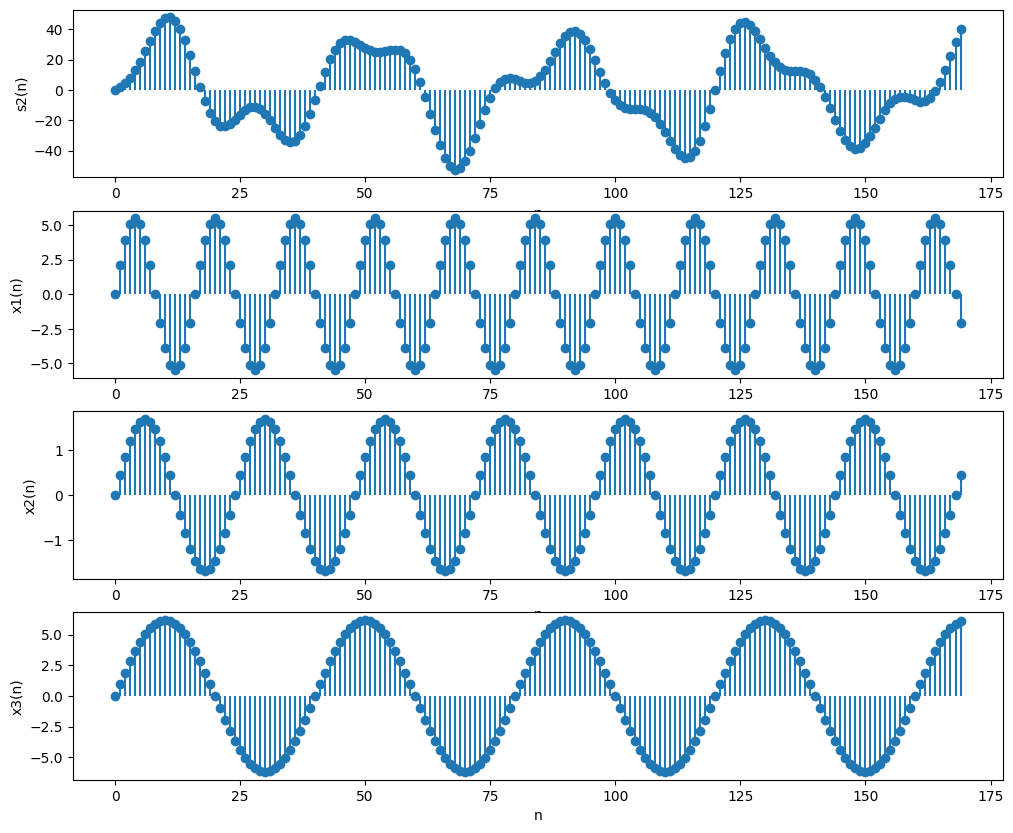

In [39]:
plt.figure(figsize=(12, 10))

s2_values = s2(n)
plt.subplot(4, 1, 1)
plt.stem(n, s2_values, basefmt=' ')
plt.xlabel('n')
plt.ylabel('s2(n)')

for i, xs_i in enumerate(xs(n), start=1):
    plt.subplot(4, 1, i + 1)
    plt.stem(n, xs_i, basefmt=' ')
    plt.xlabel('n')
    plt.ylabel(f'x{i}(n)')

In [41]:
mean_s2 = np.mean(s2_values)
E = np.sum(s2_values ** 2)
P = E / len(s2_values)

print(f"Среднее значение s2: {mean_s2}")
print(f"Энергия s2: {E}")
print(f"Средняя мощность s2: {P}")

Среднее значение s2: 0.789210650777783
Энергия s2: 110847.78920679263
Средняя мощность s2: 652.045818863486


При построении линейной комбинации сигналов $s_2(k)$ выполняются следующие шаги:

1. Сначала идет формирование трех гармонических дискретных сигналов $x_1(k)$, $x_2(k)$ и $x_3(k)$ с заданными амплитудами $B_i$ и угловыми частотами $\hat{\omega_i}$.

2. Далее каждый сигнал масштабируется коэффициентом $a_i$, что позволяет управлять вкладом соответствующей гармоники в общий сигнал.

3. В конце сигналы суммируются, формируя результирующую последовательность $s_2(k)$.
   В зависимости от их фазовых соотношений возможны эффекты интерференции: при совпадении фаз происходит **усиление** сигнала, а при противоположных фазах — **ослабление**.

Указанные характеристики (среднее значение, энергия и средняя мощность последовательности $s_2(k)$) определяются так:

- Среднее значение (`mean_s2`):

  $$
  \text{mean\_s2} = \frac{1}{5N} \sum_{k=0}^{5N-1} s_2(k)
  $$
- Энергия (`E`):
  $$
  E = \sum_{k=0}^{5N-1} |s_2(k)|^2
  $$

- Средняя мощность (`P`):

  $$
  P = \frac{E}{5N}
  $$

- Вывести график дискретного сигнала $ s_3(k) $ представляющего собой дискретный гармонический сигнал $ s(k) $ $$ s(k) = C\cos(\hat{\omega}_0k) $$ с экспоненциальной огибающей $ |a|^k $, на интервале времени $ n \in [0, N-1] $. Привести аналитическую формулу дискретного сигнала $ s_3(k) $ и пояснить операции при его моделировании.


Чтобы получить сигнал с экспоненциальной огибающей, надо умножить гармонический сигнал на экспоненту. Тогда
$$ s_3(k) = C \cdot \cos(\hat{\omega}_0 k) \cdot (|a|^k) $$

In [43]:
n = np.arange(N)  # Отсчеты

In [44]:
def s3(n: np.ndarray) -> np.ndarray:
    return C * np.cos(w0 * n) * (np.abs(a) ** n)

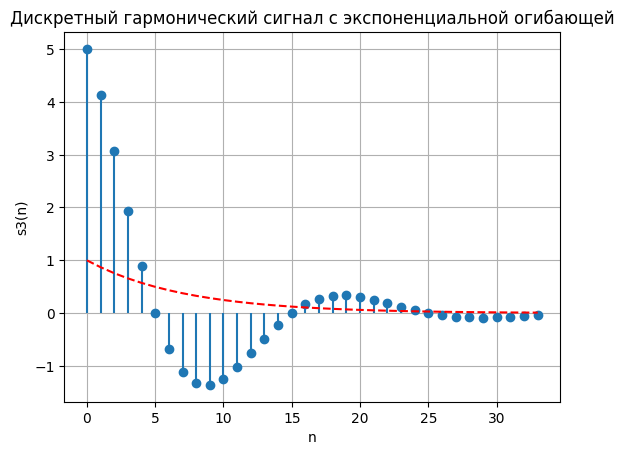

In [49]:
plt.stem(n, s3(n), basefmt=' ')
plt.plot(n, np.abs(a) ** n, 'r--', label='Экспоненциальная огибающая')
plt.title('Дискретный гармонический сигнал с экспоненциальной огибающей')
plt.xlabel('n')
plt.ylabel('s3(n)')
plt.grid()
plt.show()

При моделировании дискретного сигнала $s_3(k)$ выполняются следующие этапы:

1. В начала создается чистый гармонический сигнал $s(k) = C \cos(\hat{\omega_0} k)$ с заданной амплитудой $C$ и угловой частотой $\hat{\omega_0}$.

2. Потом вычисляется функция $|a|^k$, определяющая изменение амплитуды сигнала во времени. Параметр $|a|$ задает скорость затухания (при $|a| < 1$) или роста (при $|a| > 1$) огибающей.

3. Гармонический сигнал умножается на экспоненциальную огибающую, в результате чего формируется итоговый сигнал $s_3(k) = |a|^k \cdot C \cos(\hat{\omega_0} k)$.
   Такой сигнал сохраняет частоту $\hat{\omega_0}$, однако его амплитуда изменяется согласно экспоненциальному закону.

- Вывести график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды $ U $ и длительности $ n_{imp} $ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.


Для моделирования периодичности используется операция взятия по модулю: $ n \mod T $, где $T$ - период, таким образом отсчеты $n$ повторяются с периодом $T$.
Тогда сигнал $ s_4(k) $ можно записать как:
$$ s_4(k) = U \cdot ( \sigma_d((k \mod T) - n_0) - \sigma_d((k \mod T) - n_0 - n_{imp}) ) $$

In [53]:
T = 2 * n_imp  # Период
n = np.arange(5 * T)  # Отсчеты

In [54]:
def s4(n: np.ndarray) -> np.ndarray:
    return U * (sigma_digital(n % T - n0) - sigma_digital(n % T - n0 - n_imp))

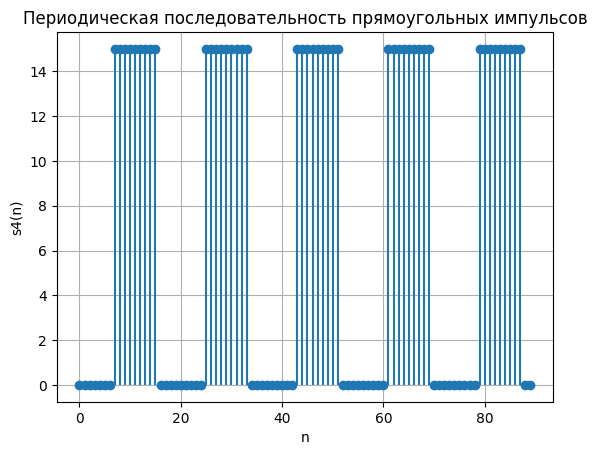

In [55]:
plt.stem(n, s4(n), basefmt=' ')
plt.title('Периодическая последовательность прямоугольных импульсов')
plt.xlabel('n')
plt.ylabel('s4(n)')
plt.grid()
plt.show()

## Выводы

В процессе выполнения работы были изучены основные определения и теоретические положения, смоделированы различные типы дискретных сигналов: единичный скачок, прямоугольный импульс, периодическая последовательность импульсов, гармонический сигнал с экспоненциальной огибающей и линейная комбинация дискретных гармонических сигналов. Для каждого типа были построены графики, подтверждающие теоретические зависимости, а также сделаны соответствующие выводы.
